### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=2
max_qubits=10
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these settings for better results
# min_qubits=4
# max_qubits=10
# max_circuits=2
# num_shots=50000

### Maxcut - Method 1

In [ ]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.verbose=False

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, rounds=1,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - CVaR

MaxCut Benchmark Program - Qiskit
... execution starting at Jun 22, 2022 06:14:53 UTC
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation Time for the 4 qubit group = 0.026 secs
Average Elapsed Time for the 4 qubit group = 0.355 secs
Average Execution Time for the 4 qubit group = 0.003 secs
Average Fidelity for the 4 qubit group = 0.025
Average Hellinger Fidelity for the 4 qubit group = 0.997

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 64, 0.53
Average Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 65, 0.496, 48.0
Average Creation Time for the 6 qubit group = 0.038 secs
Average Elapsed Time for the 6 qubit group = 0.423 secs
Average Execution Time for the 6 qubit group = 0.006 secs

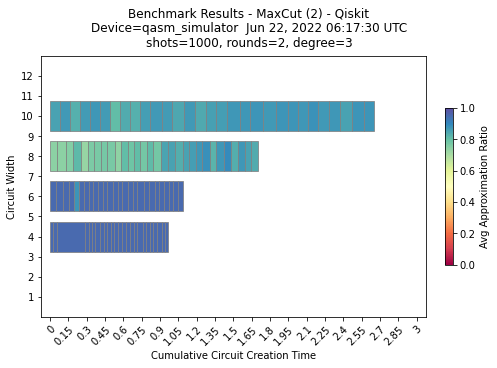

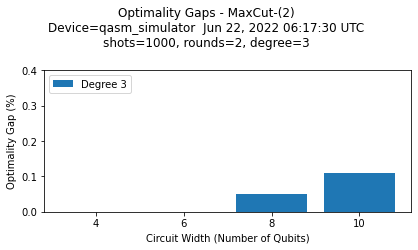

In [4]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.verbose=False

score_metric=['approx_ratio'] #, 'fidelity'
x_metric=['cumulative_create_time'] #, 'cumulative_exec_time', 'cumulative_opt_exec_time'

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, alpha = 0.1,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Max method

MaxCut Benchmark Program - Qiskit
... execution starting at Jun 22, 2022 06:19:48 UTC
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation Time for the 4 qubit group = 0.026 secs
Average Elapsed Time for the 4 qubit group = 0.368 secs
Average Execution Time for the 4 qubit group = 0.008 secs
Average Fidelity for the 4 qubit group = 0.966
Average Hellinger Fidelity for the 4 qubit group = 0.993

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 64, 0.53
Average Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 65, 0.496, 48.0
Average Creation Time for the 6 qubit group = 0.037 secs
Average Elapsed Time for the 6 qubit group = 0.405 secs
Average Execution Time for the 6 qubit group = 0.005 secs

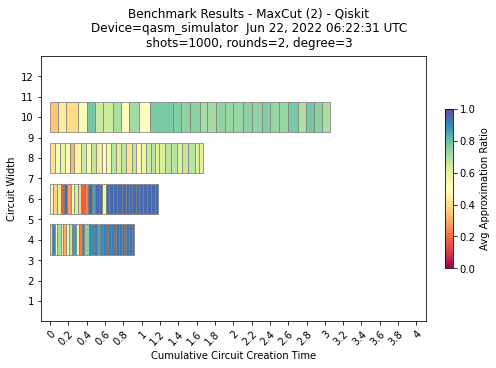

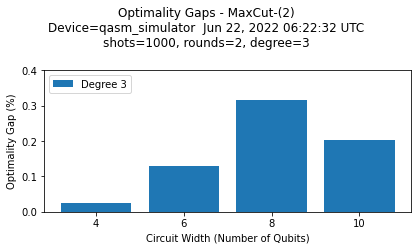

In [5]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.verbose=False

score_metric=['approx_ratio'] #, 'fidelity'
x_metric=['cumulative_create_time'] #, 'cumulative_exec_time', 'cumulative_opt_exec_time'

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, N = 10, alpha = None,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Average method

MaxCut Benchmark Program - Qiskit
... execution starting at Jun 22, 2022 06:24:29 UTC
************
Executing [3] circuits with num_qubits = 4
  ... problem 004 not found, limiting to 1 circuit(s).
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation Time for the 4 qubit group = 0.028 secs
Average Elapsed Time for the 4 qubit group = 0.367 secs
Average Execution Time for the 4 qubit group = 0.005 secs
Average Fidelity for the 4 qubit group = 0.981
Average Hellinger Fidelity for the 4 qubit group = 0.99

************
Executing [3] circuits with num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 64, 0.53
Average Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 65, 0.496, 48.0
Average Creation Time for the 6 qubit group = 0.041 secs
Average Elapsed Time for the 6 qubit group = 0.42 secs
Average Execution Time for the 6 qubit group = 0.006 secs
A

F:\Dropbox\App-oriented-benchmarks\Code\Maxcut\maxcut\qiskit\../../_common\metrics.py:594: RuntimeWarning: divide by zero encountered in double_scalars
  rescaled_fidelity = (1-new_floor_fidelity)/(1-floor_fidelity) * (fidelity - 1) + 1


************
Average Depth, ξ (xi) for the 8 qubit group = 70, 0.53
Average Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 71, 0.496, 64.0
Average Creation Time for the 8 qubit group = 0.056 secs
Average Elapsed Time for the 8 qubit group = 0.453 secs
Average Execution Time for the 8 qubit group = 0.005 secs
Average Fidelity for the 8 qubit group = 0.735
Average Hellinger Fidelity for the 8 qubit group = 0.91

************
Executing [3] circuits with num_qubits = 10
************
Average Depth, ξ (xi) for the 10 qubit group = 88, 0.53
Average Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 89, 0.496, 80.0
Average Creation Time for the 10 qubit group = 0.089 secs
Average Elapsed Time for the 10 qubit group = 0.5 secs
Average Execution Time for the 10 qubit group = 0.008 secs
Average Fidelity for the 10 qubit group = 0.525
Average Hellinger Fidelity for the 10 qubit group = 0.705

... execution complete at Jun 22, 2022 06:27:14 UTC in 165.8 secs

Sample Circuit:
  

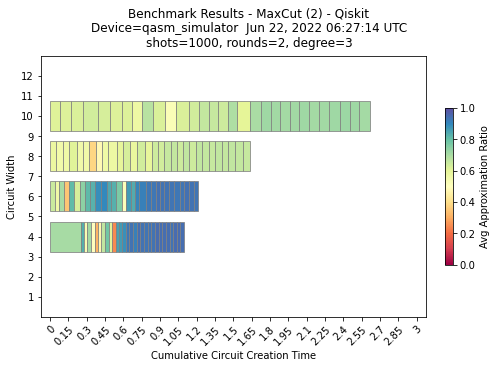

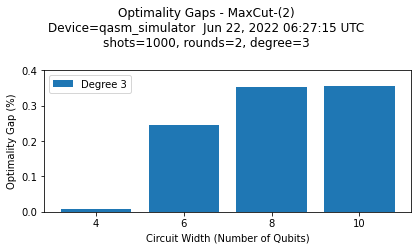

In [6]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.verbose=False

score_metric=['approx_ratio'] #, 'fidelity'
x_metric=['cumulative_create_time'] #, 'cumulative_exec_time', 'cumulative_opt_exec_time'

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, N = 0, alpha = None,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree -3

In [ ]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.verbose=False

score_metric=['approx_ratio', 'fidelity']
x_metric=['cumulative_create_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=1, degree=-3,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

In [ ]:
maxcut_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)

### Expected Measurement Distribution Example

The next cell is an auto-generated circuit with beta and gamma set to the optimal parameters (in terms of pi)


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

beta = 0.08
gamma = -0.094
cycle_time = 0

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr, name="main")
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.rz(2*3.14159*gamma, qr[1])
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[0], qr[3])
qc.cx(qr[0], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[0], qr[2])
qc.cx(qr[1], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[1], qr[2])
qc.cx(qr[1], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[2], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[2], qr[3])
qc.rx(2*3.14159*beta, qr[0])
qc.rx(2*3.14159*beta, qr[1])
qc.rx(2*3.14159*beta, qr[2])
qc.rx(2*3.14159*beta, qr[3])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

from qiskit import execute, Aer
backend = Aer.get_backend("qasm_simulator")  # Use Aer qasm_simulator

job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts are:", counts)

# Draw the circuit
print(qc)

# Plot a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)
